In [1]:
# %matplotlib nbagg
%matplotlib inline

import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import lib.util as u

In [2]:
def parse_line(line):
    pieces = re.split('<|>', line)
    x, y = pieces[1].split(',')
    dx, dy = pieces[3].split(',')

    return {
        'x': int(x),
        'y': int(y),
        'dx': int(dx),
        'dy': int(dy)
    }


def to_dataframe(input):
    return pd.DataFrame.from_records(input)


def dataframe_at_time(df, t=0):
    df = df.copy()
    df['x'] = df['x'] + t * df['dx']
    df['y'] = df['y'] + t * df['dy']
    return df

## Demo

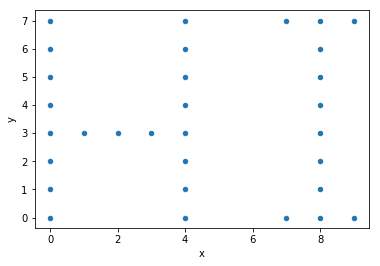

In [3]:
demo_txt = '''position=< 9,  1> velocity=< 0,  2>
position=< 7,  0> velocity=<-1,  0>
position=< 3, -2> velocity=<-1,  1>
position=< 6, 10> velocity=<-2, -1>
position=< 2, -4> velocity=< 2,  2>
position=<-6, 10> velocity=< 2, -2>
position=< 1,  8> velocity=< 1, -1>
position=< 1,  7> velocity=< 1,  0>
position=<-3, 11> velocity=< 1, -2>
position=< 7,  6> velocity=<-1, -1>
position=<-2,  3> velocity=< 1,  0>
position=<-4,  3> velocity=< 2,  0>
position=<10, -3> velocity=<-1,  1>
position=< 5, 11> velocity=< 1, -2>
position=< 4,  7> velocity=< 0, -1>
position=< 8, -2> velocity=< 0,  1>
position=<15,  0> velocity=<-2,  0>
position=< 1,  6> velocity=< 1,  0>
position=< 8,  9> velocity=< 0, -1>
position=< 3,  3> velocity=<-1,  1>
position=< 0,  5> velocity=< 0, -1>
position=<-2,  2> velocity=< 2,  0>
position=< 5, -2> velocity=< 1,  2>
position=< 1,  4> velocity=< 2,  1>
position=<-2,  7> velocity=< 2, -2>
position=< 3,  6> velocity=<-1, -1>
position=< 5,  0> velocity=< 1,  0>
position=<-6,  0> velocity=< 2,  0>
position=< 5,  9> velocity=< 1, -2>
position=<14,  7> velocity=<-2,  0>
position=<-3,  6> velocity=< 2, -1>'''

demo_input = [parse_line(line) for line in demo_txt.split('\n')]
demo_df = to_dataframe(demo_input)
dataframe_at_time(demo_df, 3).plot.scatter(x='x', y='y')

## Explore

In [4]:
input = u.get_input_from_file('./input.dat', parser=dayA.parse_line)
df = dayA.to_dataframe(input)

In [ ]:
for i in range(10):
    df_t1 = dayA.dataframe_at_time(df, i)
    print(df_t1['x'].max() - df_t1['x'].min())

In [ ]:
def alignment(df, t_offset, steps):
    records = []
    for i in range(t_offset, t_offset + steps):
        df_at_t = dayA.dataframe_at_time(df, i)
        value = df_at_t.groupby('x')['x'].agg('count').max() + df_at_t.groupby('y')['y'].agg('count').max()
        records.append({'t': i, 'aligned': value})
    return pd.DataFrame.from_records(records)

In [ ]:
a = alignment(df, 10000, 100)
a.set_index('t', inplace=True)

In [ ]:
a.plot()

In [ ]:
a.idxmax()

In [ ]:
df_at_10036 = dayA.dataframe_at_time(df, 10036)
df_at_10036['inverse_y'] = - df_at_10036['y']
df_at_10036.plot.scatter(x='x', y='inverse_y')

## Animation

In [ ]:
def plot_df(df, step_size=1):
    df_copy = df.copy()
    
    fig = plt.figure()

    def update():
        plt.clf()
        df_copy['x'] = df_copy['x'] + step_size * df_copy['dx']
        df_copy['y'] = df_copy['y'] + step_size * df_copy['dy']
        return plt.scatter(x=df_copy['x'], y=df_copy['y'], alpha=0.8)

    return animation.FuncAnimation(fig, update, frames=1, interval=2000, repeat=True)
